# Regresión

Ejemplo de regresión multilineal<br>

In [3]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Procesar datos

In [4]:
df = pd.read_csv("propiedades.csv")

In [5]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Unnamed: 0,Unnamed: 0.1,latitud,longitud,precio,m2,ambientes
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1048.000000,1044.000000
mean,524.500000,524.500000,-34.526132,-58.423896,35737.122857,62.232777,2.143678
std,303.253195,303.253195,2.549434,2.319076,49897.697379,56.281333,1.339870
min,0.000000,0.000000,-38.505290,-120.740135,27.000000,0.000000,0.000000
25%,262.250000,262.250000,-34.608908,-58.448631,16800.000000,35.000000,1.000000
50%,524.500000,524.500000,-34.594705,-58.423578,25000.000000,45.000000,2.000000
75%,786.750000,786.750000,-34.578902,-58.395060,39000.000000,70.000000,3.000000
max,1049.000000,1049.000000,47.751076,-34.588875,820000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.571429


In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,latitud,longitud,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,0,-34.611270,-58.36378,Departamento-alquiler - Puerto Madero-situar,Apartamento,2900.0,USD,192.0,4.0
1,1,1,-34.589848,-58.50942,Oportunidad! Monoambiente A Estrenar - Alquile...,Apartamento,50.0,USD,38.0,1.0
2,2,2,-34.605970,-34.60597,Alquiler Temporario De Lujo 4/p Hospital Itali...,Apartamento,1866.0,COP,57.0,1.0
3,3,3,-34.590656,-58.44873,Excelente Departamento 3 Ambientes (2 Cuartos)...,Apartamento,30000.0,COP,60.0,3.0
4,4,4,-34.624084,-58.38989,Departamentos Alquil Temporario Centro Cap Fed...,Apartamento,2100.0,COP,64.0,3.0


In [7]:
# Sacamos todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre vacio
df_clean = df.copy()
df_clean.dropna(subset=['m2'], inplace=True)
df_clean.dropna(subset=['ambientes'], inplace=True)

# Otra manera de obtener el mismo resultado:
#df_clean = df[df['m2'].notna()]
#df_clean = df_clean[df_clean['ambientes'].notna()]

In [8]:
# ¿Cuántos datos quedaron para analizar?
# (filas, columnas)
df_clean.shape

(1044, 10)

## Fin de la limpieza
Se finalizó la limpieza sacando aquellas filas que no eran de interes, se puede observar que la cantidad de filas hasta el momento es menor a la cantidad de filas con la que se comnezó el análisis

In [9]:
print('Cantidad de datos en observacion:', df_clean.shape[0])

Cantidad de datos en observacion: 1044


# Explorar datos

In [10]:
df_clean.head()

,Unnamed: 0,Unnamed: 0.1,latitud,longitud,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,0,-34.611270,-58.36378,Departamento-alquiler - Puerto Madero-situar,Apartamento,2900.0,USD,192.0,4.0
1,1,1,-34.589848,-58.50942,Oportunidad! Monoambiente A Estrenar - Alquile...,Apartamento,50.0,USD,38.0,1.0
2,2,2,-34.605970,-34.60597,Alquiler Temporario De Lujo 4/p Hospital Itali...,Apartamento,1866.0,COP,57.0,1.0
3,3,3,-34.590656,-58.44873,Excelente Departamento 3 Ambientes (2 Cuartos)...,Apartamento,30000.0,COP,60.0,3.0
4,4,4,-34.624084,-58.38989,Departamentos Alquil Temporario Centro Cap Fed...,Apartamento,2100.0,COP,64.0,3.0


Se puede observar que hay alquileres en dolares, solo nos quedaremos con aquellos alquileres en pesos

In [11]:
# Filtramos el dataframe, solos nos quedamos con los alquileres en pesos
df_ars = df_clean[df_clean['moneda'] == 'COP']
print('Cantidad de datos en observacion:', df_ars.shape[0])

Cantidad de datos en observacion: 928


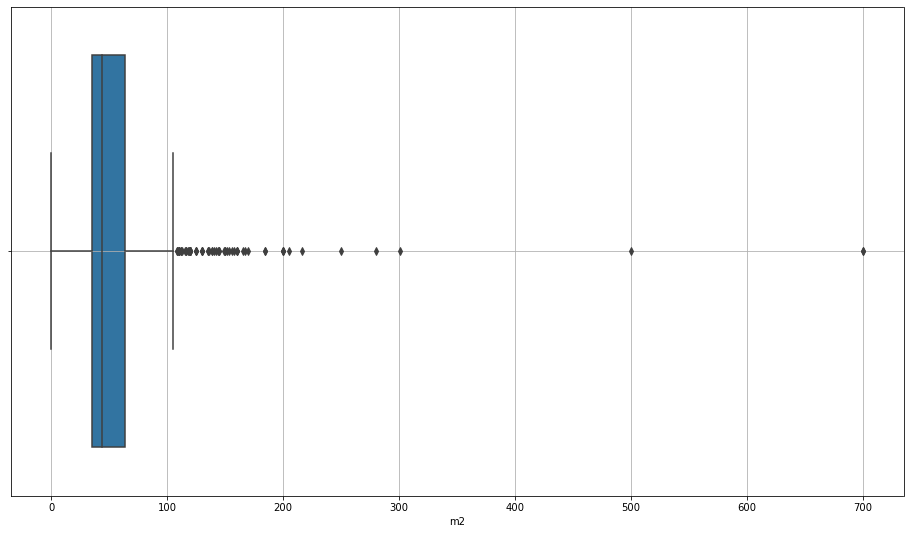

In [12]:
# Renderizamos el gráfico utilizando el diagrama de cajas
#df_ars.boxplot(column=['m2'])
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df_ars['m2'], ax=ax)
ax.grid('dashed')

Se puede observar que hay muchos alquileres "outliers", es decir que se escapan de la tendencia. Filtraremos aquellos que no aportan al análisis

In [13]:
# Nos quedamos solamente con los deparamentos menor a 200m2 y mayor a 50m2
# Utilizamos el concepto de "máscara" tal cual fue visto en Numpy
# para filtrar el dataframe de propiedads deseado
propiedades = df_ars[(df_ars['m2'] < 200) & (df_ars['m2'] > 50)]

In [14]:
print('Cantidad de datos en observacion:', propiedades.shape[0])

Cantidad de datos en observacion: 323


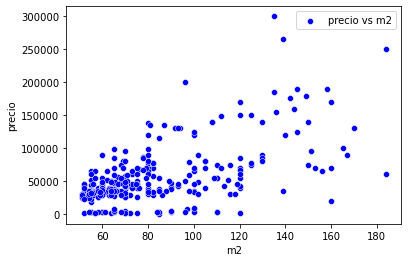

In [15]:
# Graficar la tendencia
sns.scatterplot(x=propiedades['m2'], y=propiedades['precio'], color='b', label='precio vs m2')
plt.show()

# Entrenar modelo

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [16]:
X = propiedades[['m2', 'ambientes']].values
y = propiedades['precio'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [17]:
from sklearn.model_selection import train_test_split
# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Crear un modelo de regresión multilineallineal

In [18]:
from sklearn import linear_model
# Calcular y visualizar le prediccion de costos por m2
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

# Validar modelo

In [19]:
from sklearn.metrics import r2_score
# En este caso, ya que se trata de una regresión lineal puedo relacinonar el
# índice R2 con el coeficiente de correlación lineal.
value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.42


# Utilizar modelo

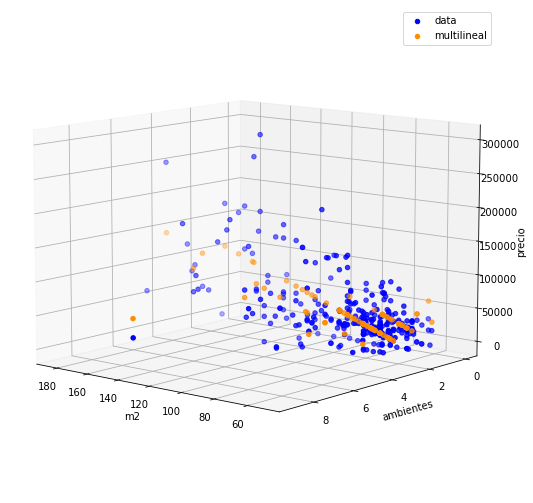

In [20]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(propiedades['m2'], propiedades['ambientes'], propiedades['precio'], color='b', label='data')
ax.scatter(X_test[:, 0], X_test[:, 1], y_hat, color='darkOrange', label='multilineal')
ax.set_xlabel('m2')
ax.set_ylabel('ambientes')
ax.set_zlabel('precio')
ax.legend()
ax.view_init(10, 130)
plt.show()

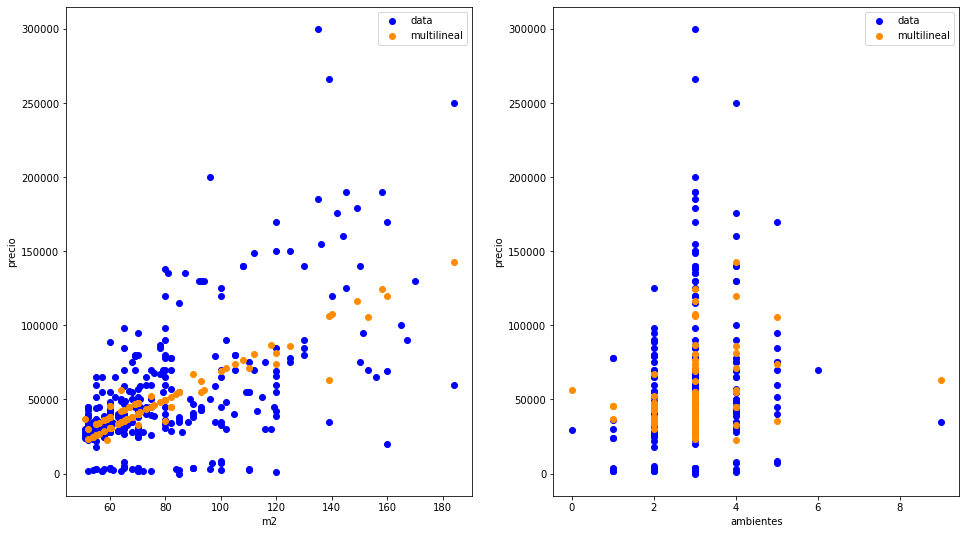

In [21]:
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(propiedades['m2'], propiedades['precio'], color='b', label='data')
ax1.scatter(X_test[:, 0], y_hat, color='darkOrange', label='multilineal')
ax1.set_xlabel('m2')
ax1.set_ylabel('precio')
ax1.legend()

ax2.scatter(propiedades['ambientes'], propiedades['precio'], color='b', label='data')
ax2.scatter(X_test[:, 1], y_hat, color='darkOrange', label='multilineal')
ax2.set_xlabel('ambientes')
ax2.set_ylabel('precio')
ax2.legend()
plt.show()

In [22]:
# Calcular los errores del modelo base
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Error promedio - Regresion Multilineal:', mean_absolute_error(y_test, y_hat))
print('Error MSE - Regresion Multilineal:', mean_squared_error(y_test, y_hat))

Error promedio - Regresion Multilineal: 23069.443365822153
Error MSE - Regresion Multilineal: 1214335340.4054627


# Conclusión

En este ejemplo de propiedades se puede notar que agregar más variables/features en consideración que estén vinculados con la salida (target, precio) mejora el modelo.